In [ ]:
!pip install datascience

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 725.0/725.0 kB 23.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 50.8 MB/s eta 0:00:00


In [ ]:
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np

# 오류 확률

두 가설 중 어느 것이 우리 데이터에 의해 더 잘 뒷받침되는지 결정하는 과정에서, 마지막 단계는 데이터와 귀무가설의 일치성에 대한 판단을 포함합니다. 이 단계는 대부분의 경우 좋은 결정을 내리지만, 때때로 우리를 잘못된 길로 인도할 수 있습니다. 그 이유는 확률적 변동입니다. 예를 들어, 귀무가설이 참일 때조차도 확률적 변동으로 인해 표본이 귀무가설이 예측하는 것과 상당히 다르게 보일 수 있습니다.

## 잘못된 결론

귀무가설이 참이 아니라는 대립가설에 대해 귀무가설을 검정하고 있다면, 현실과 검정 결과를 분류하는 네 가지 방법이 있습니다.

|     | 검정이 귀무가설 지지 | 검정이 대립가설 지지 |
|----:|:-----------------------|:------------------------|
|**귀무가설이 참**| 올바른 결과 | 오류 |
|**대립가설이 참**| 오류 | 올바른 결과 |

이 표의 네 셀 중 두 셀에서, 검정 결과가 잘못되었습니다. 한 유형의 오류는 실제로 귀무가설이 참일 때 검정이 대립가설을 지지하는 경우 발생합니다. 다른 유형의 오류는 실제로 대립가설이 참일 때 검정이 귀무가설을 지지하는 경우 발생합니다.

귀무가설은 완전히 지정된 확률 모델이므로, 첫 번째 유형의 오류는 우리가 추정할 수 있는 확률을 가집니다. 답은 본질적으로 p-값에 사용하는 기준점으로 밝혀집니다. 어떻게 되는지 봅시다.

## 오류의 확률
동전이 공정한지 아닌지 검정하고 싶다고 가정해봅시다. 그러면 가설은:

**귀무가설:** 동전은 공정합니다. 즉, 결과는 *앞면, 뒷면*에서 복원 추출로 이루어진 무작위 추출과 같습니다.

**대립가설:** 동전은 공정하지 않습니다.

동전을 2000번 던진 결과를 기반으로 이 가설을 검정할 것이라고 가정합시다. 공정한 동전이 2000번 중 1000번 앞면이 나올 것으로 예상되므로, 사용할 합리적인 검정통계량은

$$
\text{검정통계량} ~ = ~ \big{\vert} ~ \text{앞면 수} - 1000 ~ \big{\vert}
$$

이 통계량의 작은 값은 귀무가설을 지지하고, 큰 값은 대립가설을 지지합니다.

우리는 귀무가설 하에서 이 통계량을 여러 번 시뮬레이션했고, 그것의 경험적 분포를 그렸습니다.

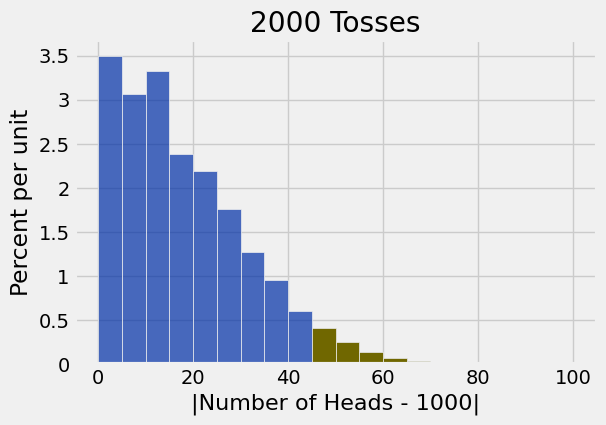

In [ ]:
fair_coin = [0.5, 0.5]

def one_simulated_statistic():
    number_of_heads = 2000 * sample_proportions(2000, fair_coin).item(0)
    return abs(number_of_heads - 1000)

repetitions = 50000

statistics = make_array()
for i in np.arange(50000):
    statistics = np.append(statistics, one_simulated_statistic())

results = Table().with_column('|Number of Heads - 1000|', statistics)
results.hist(bins = np.arange(0, 101, 5), left_end=45)
plots.title('2000 Tosses');

45의 오른쪽 면적은 금색으로 칠해져 있으며, 5% 바로 아래입니다.

In [ ]:
np.count_nonzero(statistics >= 45) / repetitions

0.04638

검정통계량의 큰 값은 대립가설을 지지합니다. 따라서 p-값에 대해 5% 기준점을 사용하고 싶다면, 결정 규칙은 검정통계량이 45 이상으로 나오면 동전이 공정하지 않다고 결론짓는 것입니다.

그러나 그림이 보여주듯이, 공정한 동전도 45 이상의 검정통계량 값을 생성할 수 있습니다. 사실 약 5%의 확률로 그렇게 합니다.

요약: *동전이 공정하고* 우리 검정이 동전이 공정한지 여부를 결정하기 위해 5% 기준점을 사용한다면, 검정이 잘못 동전이 공정하지 않다고 결론짓을 확률이 약 5%입니다.

## p-값의 기준점은 오류 확률입니다
위의 예는 일반적인 사실의 특수한 경우입니다:

**p-값에 대해 $p$% 기준점을 사용하고, 귀무가설이 우연히 참이라면, 검정이 대립가설이 참이라고 결론지을 확률이 약 $p$%입니다.**

다음은 네 가지 가능한 현실/검정 결과의 표입니다. 상단 행의 확률은 귀무가설이 참이라는 가정 하에서 계산됩니다. p-값은 빨간색으로 표시된 오류의 확률입니다.

|     | 검정이 귀무가설 지지 | 검정이 대립가설 지지 |
|----:|:-----------------------|:------------------------|
|**귀무가설이 참**| 올바른 결과 | <p style="color:red;"><b>오류</b></p> |
|**대립가설이 참**| 오류 | 올바른 결과 |

### 오류 제어 ###
따라서 1% 기준점은 5%보다 보수적입니다. 1% 기준점을 사용하면 귀무가설이 우연히 참일 때 "대립가설"이라고 결론짓을 확률이 적습니다. 이러한 이유로, 의학적 치료의 무작위 대조 실험은 일반적으로 다음 두 가설 사이를 결정하기 위해 1%를 기준점으로 사용합니다:

**귀무가설:** 치료는 효과가 없습니다; 치료 그룹과 대조 그룹 환자의 결과 사이에 관찰된 차이는 무작위화 때문입니다.

**대립가설:** 치료는 효과가 있습니다.

아이디어는 치료가 실제로 아무것도 하지 않을 때 치료가 무언가를 한다고 결론짓을 확률을 제어하는 것입니다. 이것은 환자에게 쓸모없는 치료를 제공하는 위험을 줄입니다.

그러나 기준점을 1%만큼 낮게 설정하더라도, 치료가 아무것도 하지 않는다면, 치료가 무언가를 한다고 결론짓을 확률이 약 1%입니다. 이것은 확률적 변동 때문입니다. 무작위 표본의 데이터가 결국 당신을 잘못된 길로 인도할 작은 확률이 있습니다. 무작위 표본추출의 장점은 그 확률을 찾을 수 있다는 것입니다.

## 데이터 스누핑과 p-해킹
위의 논의는 100개의 다른 연구 그룹이 각각 실제로 효과가 없는 치료의 효과에 대해 별도의 무작위 대조 실험을 실행하고, 각 실험이 p-값에 대해 1% 기준점을 사용한다면, 확률적 변동에 의해 그 중 하나의 실험이 잘못 치료가 효과가 있다고 결론짓을 것으로 예상된다는 것을 의미합니다.

불행히도, 그것이 출판되는 것일 수 있습니다. 이것이 실험이 *재현*되는 것이 중요한 이유입니다. 즉, 다른 연구자들이 실험을 수행하고 유사한 결과를 얻는지 볼 수 있어야 합니다.

연구자들이 동일한 데이터를 사용하여 여러 가설을 검정하는 것은 드문 일이 아닙니다. 예를 들어, 약물의 효과에 대한 무작위 대조 실험에서, 연구자들은 약물이 다양한 질병에 효과가 있는지 검정할 수 있습니다.

이제 약물이 아무것에도 효과가 없다고 가정합시다. 단지 확률적 변동에 의해, 소수의 검정이 효과가 있다고 결론짓을 수 있습니다. 따라서 가설 검정을 사용하고 치료가 효과가 있다고 결론짓는 연구를 읽을 때, 항상 연구자들이 보고된 효과를 찾기 전에 얼마나 많은 다른 효과를 검정했는지 물어보십시오.

연구자들이 "매우 통계적으로 유의한" 결과를 찾기 전에 여러 다른 검정을 실행했다면, 결과를 조심스럽게 사용하십시오. 연구는 *데이터 스누핑*으로 인해 손상될 수 있으며, 이는 본질적으로 데이터를 고문하여 거짓 자백을 하게 만드는 것을 의미합니다. 이것은 때때로 *p-해킹*이라고도 합니다.

그러한 상황에서, 보고된 결과를 검증하는 한 가지 방법은 실험을 재현하고 그 특정 효과만 검정하는 것입니다. 다시 유의하게 나온다면, 원래 결론을 검증할 것입니다.

## 기술적 참고 사항: 다른 종류의 오류
물론, 다른 종류의 오류도 있습니다: 치료가 실제로 무언가를 할 때 치료가 아무것도 하지 않는다고 결론짓는 것입니다. 그 오류에 대한 논의는 이 과정의 범위를 벗어납니다. 삶이 쉽지 않다는 것을 알아두십시오: 두 오류 중 하나를 줄이도록 검정을 설정하면, 거의 항상 다른 하나를 증가시킵니다.